# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
#a: after "="
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist .load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data

#a:

X_train = X_train.reshape(-1, 28, 28,1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
X_train , X_test = np.array(X_train) , np.array(X_test)

y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes= 10)



## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [4]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()

#a:

model.add(Conv2D(32 , (3 , 3) , activation='relu' , input_shape = (28 , 28 , 1)))
model.add(MaxPooling2D((2 , 2)))
model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2 , 2)))
model.add(Flatten())
model.add(Dense(128 ,  activation='relu'))
model.add(Dense(10 ,  activation='softmax'))


**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [5]:
# Compile the model

#a:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

# Train the model

#a:
history= model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 47s 119ms/step - loss: 0.2531 - accuracy: 0.9234 - val_loss: 0.0867 - val_accuracy: 0.9733
Epoch 2/10
375/375 [==============================] - 37s 98ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 3/10
375/375 [==============================] - 37s 99ms/step - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 4/10
375/375 [==============================] - 37s 97ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0456 - val_accuracy: 0.9868
Epoch 5/10
375/375 [==============================] - 37s 98ms/step - loss: 0.0313 - accuracy: 0.9901 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 6/10
375/375 [==============================] - 36s 96ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 7/10
375/375 [==============================] - 36s 95ms/step - loss: 0.0181 - accuracy: 0.9941 - val_loss: 0.0421 - val_accuracy

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 2s 7ms/step - loss: 0.0287 - accuracy: 0.9905
Test Accuracy: 0.9904999732971191


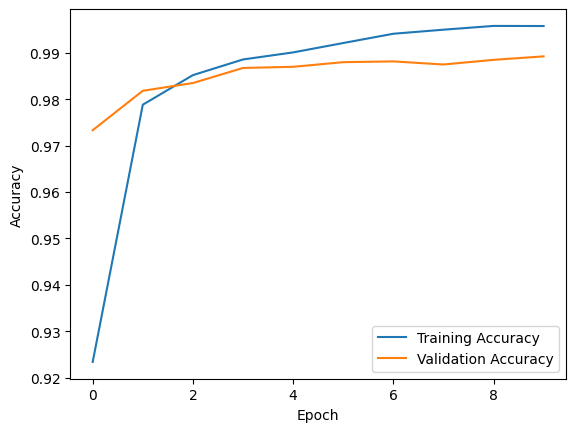

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs

#a:
plt.plot(history.history['accuracy'] , label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'] , label = 'Validation Accuracy')
#


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
